In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import math

In [2]:
df = pd.read_csv('return.csv')
df

,child,delays,return
0,3,1,0
1,2,0,1
2,1,0,1
3,4,1,0
4,5,1,0
5,3,2,0
6,2,1,1
7,5,0,1
8,6,0,1
9,3,1,0


In [3]:
x = df[['child', 'delays']]
x

,child,delays
0,3,1
1,2,0
2,1,0
3,4,1
4,5,1
5,3,2
6,2,1
7,5,0
8,6,0
9,3,1


In [15]:
y = [i for i in df['return']]
y

[0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]

In [6]:
xt = x.T
w = np.dot(np.linalg.inv(np.dot(xt, x)), xt).dot(y)
w

array([[ 0.16778523],
       [-0.29865772]])

In [44]:
y_pred = 1 / (1 + np.exp(-np.dot(x, w)))
y_pred

array([[0.55099655],
       [0.58311414],
       [0.54184818],
       [0.59205888],
       [0.63187487],
       [0.47652733],
       [0.50922714],
       [0.69823901],
       [0.73237607],
       [0.55099655],
       [0.48574212]])

In [45]:
tpr_values = []
fpr_values = []
thresholds = np.linspace(0, 1, 100) 
for threshold in thresholds:
    y_pred_thresholded = [1 if prob >= threshold else 0 for prob in y_pred]

    tp = sum((y[i] == 1) and (y_pred_thresholded[i] == 1) for i in range(len(y)))
    tn = sum((y[i] == 0) and (y_pred_thresholded[i] == 0) for i in range(len(y)))
    fp = sum((y[i] == 0) and (y_pred_thresholded[i] == 1) for i in range(len(y)))
    fn = sum((y[i] == 1) and (y_pred_thresholded[i] == 0) for i in range(len(y)))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr_values.append(tpr)
    fpr_values.append(fpr)



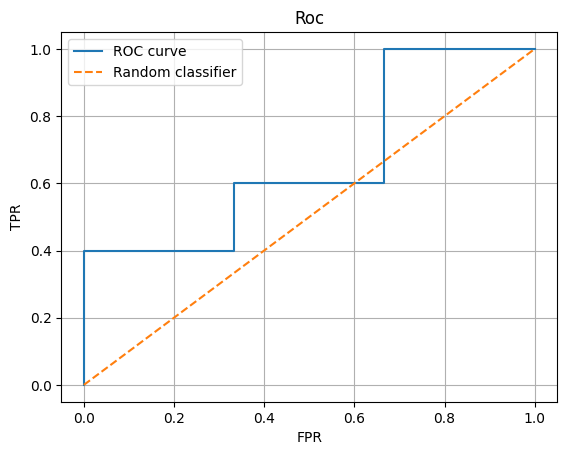

In [49]:
plt.plot(fpr_values, tpr_values, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y, y_pred)
roc_auc

0.6666666666666667